Subscribe to DataSciPie https://www.youtube.com/channel/UCClRgdNHjLdlYff86fPq5qw?sub_confirmation=1

# K-Means Clustering

Before Clustering:

![title](cluster-1.png)

After Clustering:

![title](cluster-2.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\ASUS\Desktop\Dada\Datascipie\Lecture-8\Customer_Segmentation.csv')

In [3]:
df.head()

,Age,Income
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


In [4]:
print(df.isna().sum())

Age       0
Income    0
dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

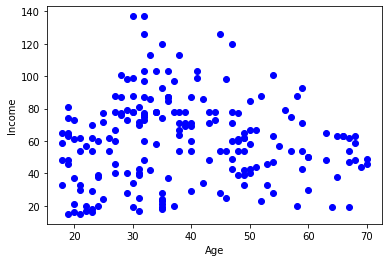

In [8]:
plt.scatter(df.Age,df.Income,c='blue')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show

# Euclidean distance:

![title](eucl-1.png)

# Methods of Finding optimum number of K

# 1.Elbow Method

![title](elbow.png)

In [21]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
edf=df[['Age',"Income"]].iloc[:,:].values
distortion=[]
intria=[]
kmax=11

for k in range(2,kmax+1):
    kmeans=KMeans(n_clusters=k).fit(edf)
    distortion.append(sum(np.min(cdist(edf,kmeans.cluster_centers_,'euclidean'),axis=1))/edf.shape[0])
    intria.append(kmeans.inertia_)

<function matplotlib.pyplot.show(*args, **kw)>

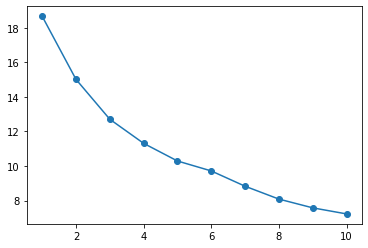

In [23]:
plt.plot(np.arange(1,11),distortion,'-o')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

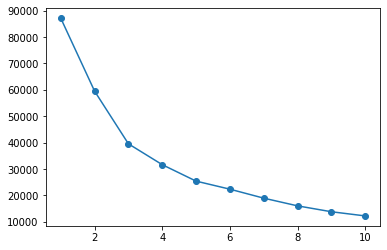

In [24]:
plt.plot(np.arange(1,11),intria,'-o')
plt.show

# Distortion and inertia: 

Distortion is the average of the euclidean squared distance from the centroid of the respective clusters. 

Inertia is the sum of squared distances of samples to their closest cluster centre

![title](cluster-2.png)

# 2.Silhouette Method

Silhouette Method defines how much data point is similar to its own cluster w.r.t. other neighbourhood cluser.

Value of Silhouette score reahes from -1 to +1.

High Silhoutte score indicates that object is well matched to its own cluster than neighbourhood cluser.

So high value of Silhoutte score is appropriate.

![title](sil-4.png)

![title](cluster-2.png)

Average distance of each point in same cluster with its centroid:

![title](sil-1.png)

Average distance of each point in nearest cluster with centroid of 1st cluster:

![title](sil-2.png)

Silhouette score:

![title](sil-3.png)

In [27]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
edf=df[['Age',"Income"]].iloc[:,:].values
sil=[]
kmax=11

for k in range(2,kmax+1):
    kmeans=KMeans(n_clusters=k).fit(edf)
    sil.append(silhouette_score(edf,kmeans.labels_,'euclidean'))

<function matplotlib.pyplot.show(*args, **kw)>

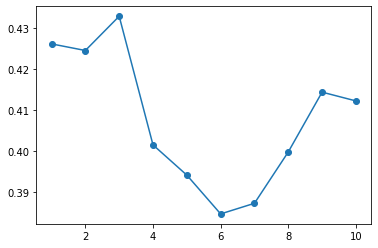

In [28]:
plt.plot(np.arange(1,11),sil,'-o')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

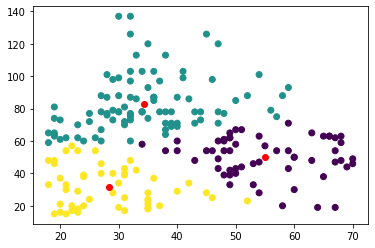

In [53]:
kmeans=KMeans(n_clusters=3).fit(edf)
plt.scatter('Age',"Income",data=df,c=kmeans.labels_)
centroid=kmeans.cluster_centers_
plt.plot(centroid[:,0],centroid[:,1],'o',c='red')
plt.show